<a href="https://colab.research.google.com/github/Userfound404/MachineLearning-101/blob/main/Magic_Telescope_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data from - https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.read_csv('magic04.data')

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## Understanding the dataset

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm] 
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
    10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
    11.  class:    g,h         # gamma (signal), hadron (background)


we'll change g to 1 and h to 0

In [ ]:
df['class'] = (df['class'] == 'g').astype(int)

Let's plot some data

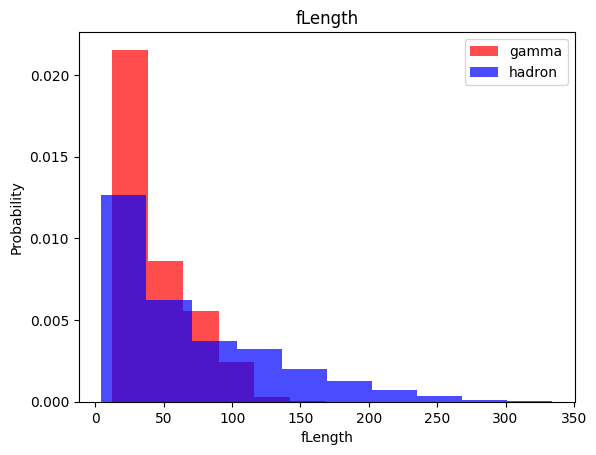

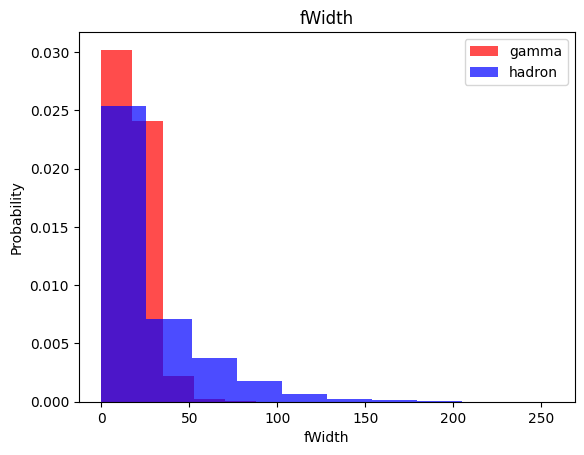

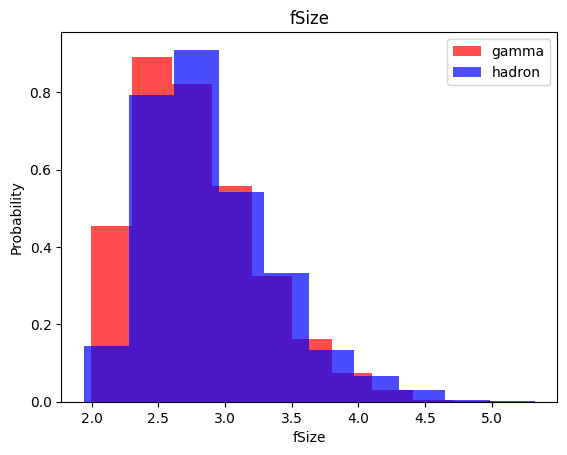

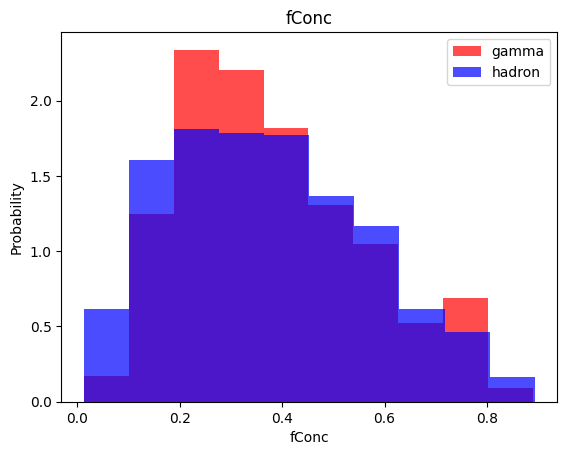

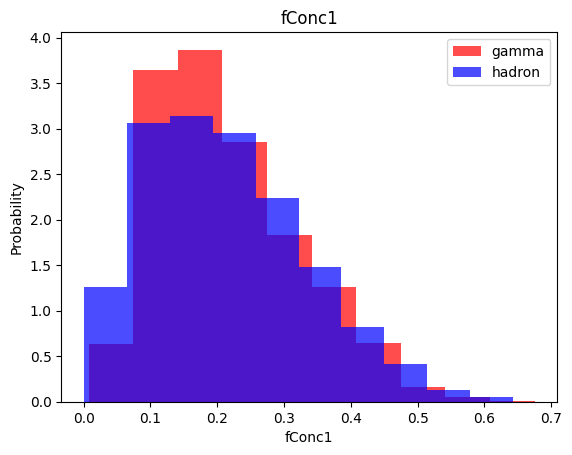

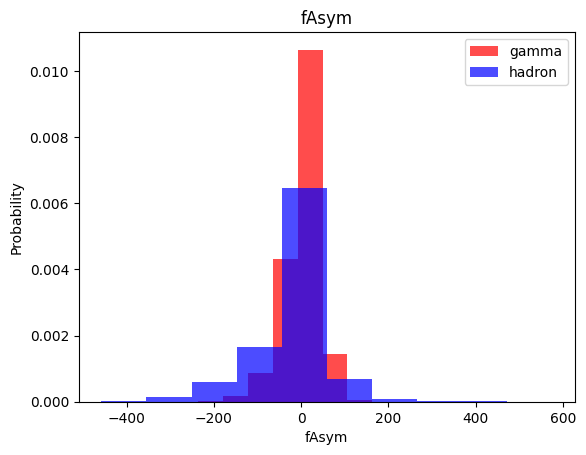

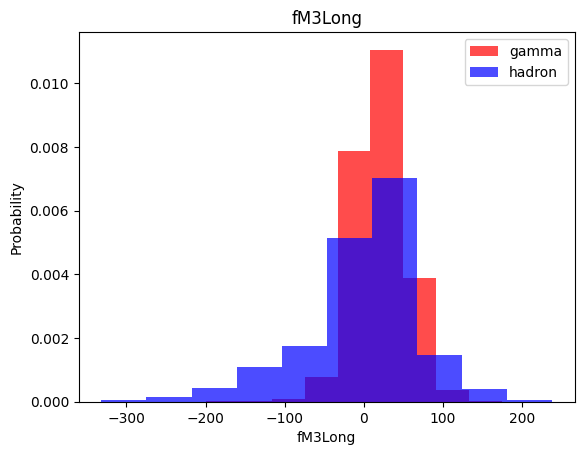

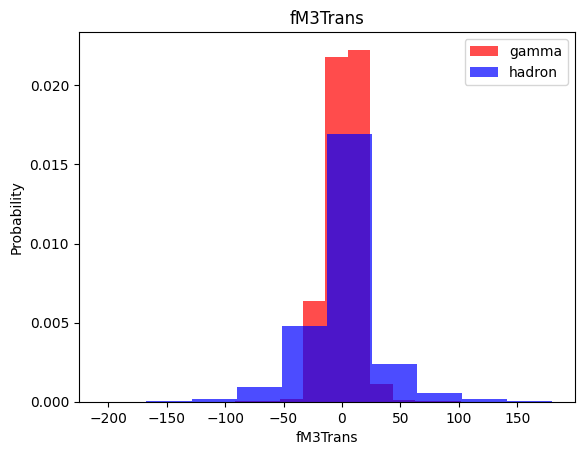

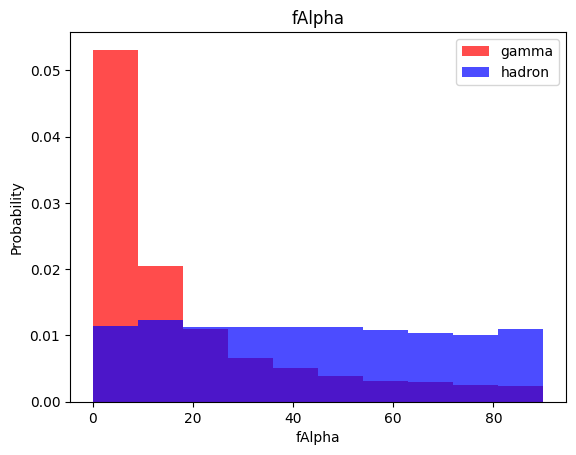

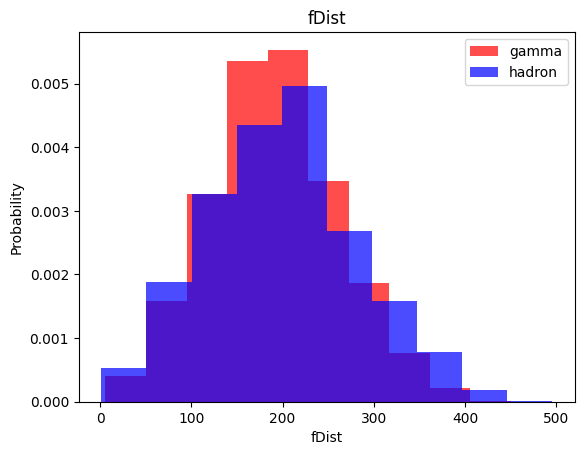

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label], color='red', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class'] == 0][label], color='blue', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability') 
  plt.xlabel(label)
  plt.legend()
  plt.show()

Dividing Datasets into train, test and validation

In [25]:
train, valid, test = np.split(df.sample(frac = 1),[int(0.6*len(df)), int(0.8*len(df))] )

Since the data is very varied, where some values go to 100s and some are in 10s, It's a good idea to normalize them

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
print(len(train[train['class'] == 1])) #gamma values
print(len(train[train['class'] == 0])) #hadron values 

7431
3981


There are around 7k values of gamma and only 4k values of hardon, so this creates an imbalance. So we oversample.

oversampling in simple terms adding duplicate examples from the minority class, called oversampling.

a package called imbalance learn provides a method for random oversampler

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values # get all the values except the labels
  y = dataframe[dataframe.columns[-1]].values #get the values of the labels( 1 and 0 here)

  #make a new scalar object
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1)))) #-1 indicates infer dimention from data

  return data, X, y


In [27]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
len(y_train)

14862

In [ ]:
sum(y_train == 1)

7431

In [ ]:
sum(y_train == 0)

7431

We've made both of them equal

## The Prediction

#### KNN. 

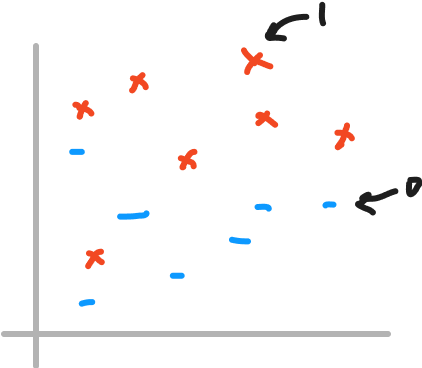

We'll use the Euclidean distance to find out the nearest neighbour. Since we choose odd number of neighbours, the one with most classes covering is our prediction

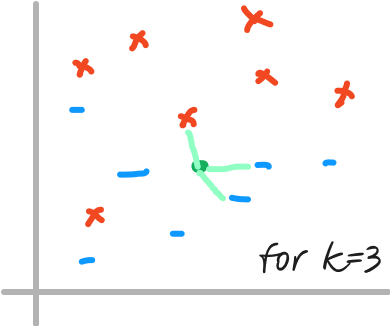

so here out prediction for the new point is 0

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [31]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
y_pred = knn_model.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1338
           1       0.83      0.90      0.86      2466

    accuracy                           0.82      3804
   macro avg       0.81      0.78      0.79      3804
weighted avg       0.81      0.82      0.81      3804



#### Naive Bayes

$$
P(C_k|X) = \frac{P(X|C_k).P(C_k)}{P(X)}
$$

- where $P(C_k|X)$ is called posterior

- $P(X|C_k).P(C_k)$ is called likelihood

- $P(C_k)$ is called prior

- $P(X)$ is called evidence

This can be generalised as
$$
P(C_k | x_1, x_2, x_3 ... x_n) ∝ P(C_k). Π^n_{i=1} P(X_i|C_k)
$$



So how naive bayes work is that we go through all the K classes and find probability of each class W.R.T to other classes and take the maximum of the highest probability, i.e. to which class our new $C_k$ belongs to among $x_1,x_2...x_n$

so our final formula is 

$$
y^{∩} = argmax_{k ⊆ {1, k}} (P(C_k| x_1, x_2...x_n)) 
$$

In [37]:
from sklearn.naive_bayes import GaussianNB

In [39]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [41]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.39      0.48      1338
           1       0.73      0.88      0.79      2466

    accuracy                           0.71      3804
   macro avg       0.68      0.63      0.64      3804
weighted avg       0.69      0.71      0.68      3804



#### Logistic Regression

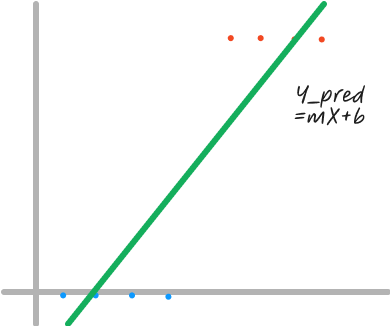

Regression predicts a number from 0 to inf. but we need the probablity of it being either of one class. so we use the likelihood i.e. predict $\frac{P}{1-P}$

but since our RHS i.e. $mX+b$ can take a negetive value we take a natural log and power it to $e$.

so we get
$$
e^{ln\frac{P}{1-P}} = e^{mX+b}
$$

solving this we get

$$
P = \frac{1}{1+e^{-(mX+b)}}
$$

which is also known as sigmoid function and this can be simplified as 
$$
S(y) = \frac{1}{1+e^{-y}} 
$$

where $y = mX+b$ here



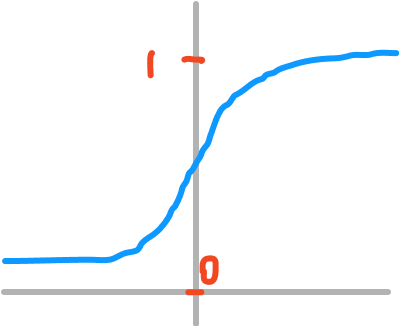

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1338
           1       0.84      0.81      0.83      2466

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#### SVMs- Support vector machines

Given a plot of classes on any N dimentions, SVM finds a N-1 dimentional division that should be able to divide the classes into two unique classes for prediction in a binary classification

for example- we have 2 classes in 2D graph and a line that divides both

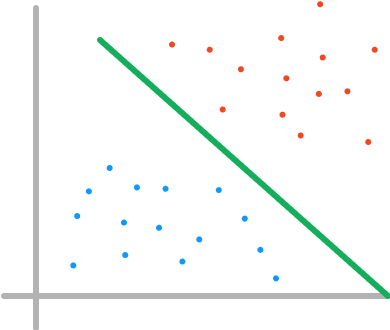

We find our line by using margins, our goal is to maximize it and then we have the best line. The points that lie on the margin are called support vectors.

**Note that SVMs perform bad if there are outliers in the data.**

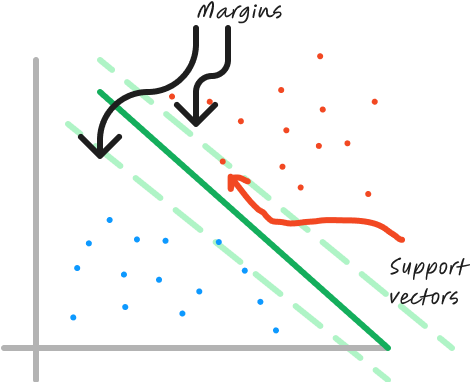

If there is are multiple divisions then we define a new hyperplane where it is easier to find a division.

for example

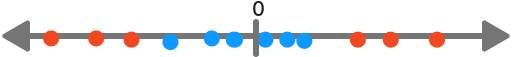

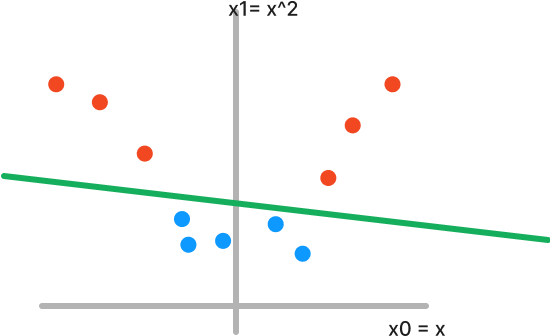

the operations that the data set goes through is called a kernel
The mathematical function used for the transformation is known as the kernel function. A few are:

- Linear
- Polynomial
- Radial basis function (RBF)
- Sigmoid



In [46]:
from sklearn.svm import SVC


In [47]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [48]:
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1338
           1       0.89      0.90      0.89      2466

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#### Neural networks

In [49]:
import tensorflow as tf


In [51]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [50]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape = (10, )),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

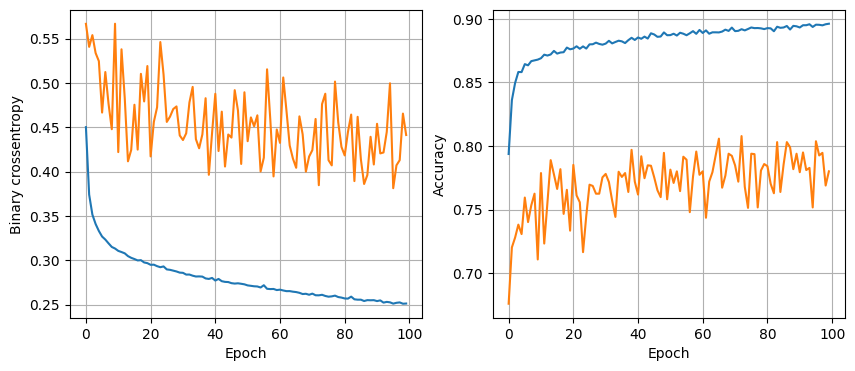

In [54]:
plot_history(history)

In [56]:
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 3ms/step


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1338
           1       0.87      0.93      0.90      2466

    accuracy                           0.87      3804
   macro avg       0.86      0.84      0.85      3804
weighted avg       0.86      0.87      0.86      3804



Use the below template to test all the instances of Hyper parameters

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model